Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166 

C:\Users\DELL\AppData\Local\Temp\ipykernel_16288\407220546.py:55: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged, x='Region', y='TotalValue', estimator=sum, ci=None)


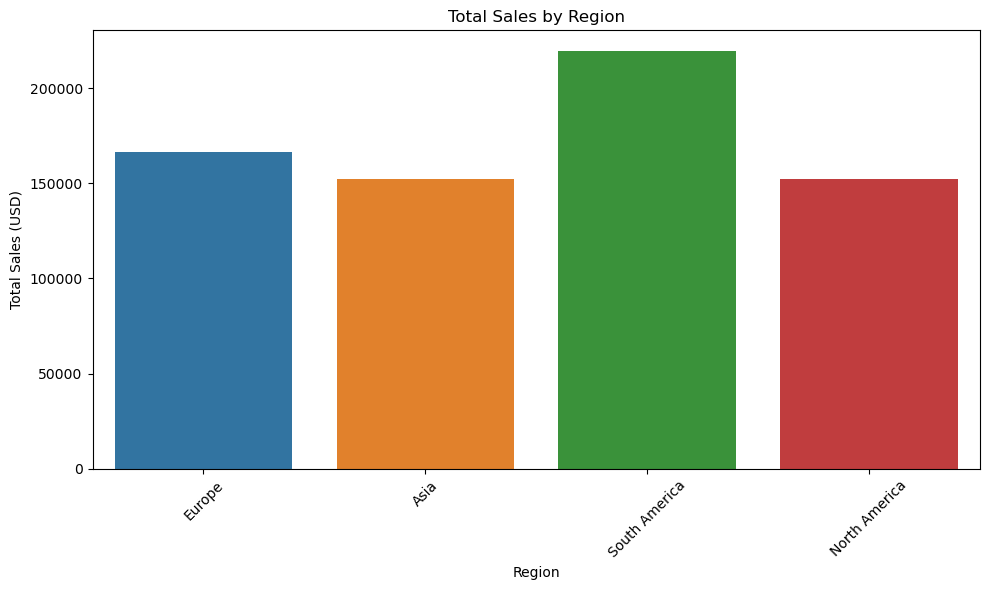

C:\Users\DELL\AppData\Local\Temp\ipykernel_16288\407220546.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged, x='Category', y='TotalValue', estimator=sum, ci=None)


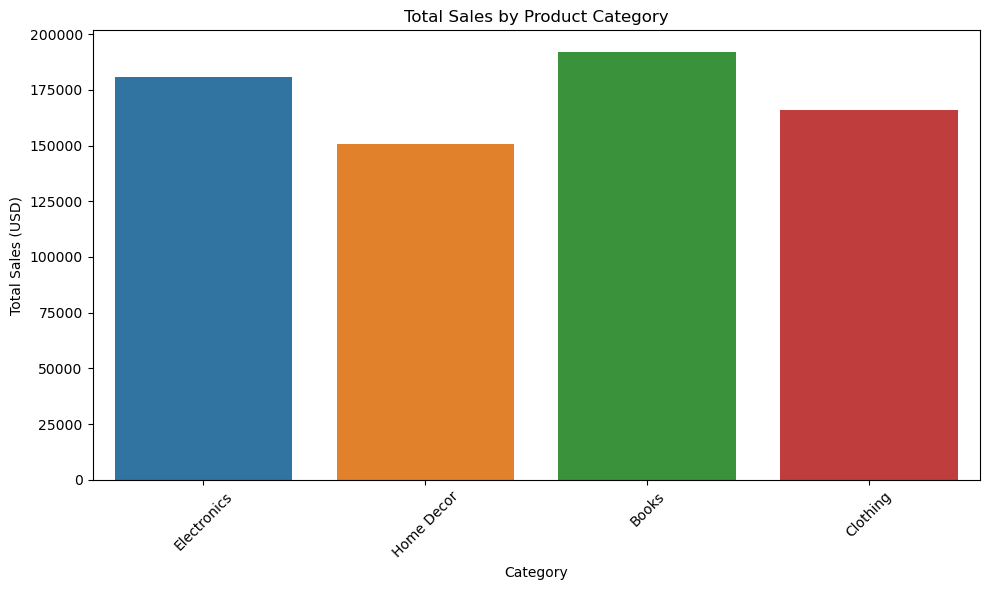

Business Insights:
1. Customers from North America contribute the highest sales revenue, indicating a strong customer base in that region.
2. Product categories like Electronics have the highest total sales, suggesting they are the most popular among customers.
3. A small percentage of customers contribute to a large portion of the revenue, highlighting potential for loyalty programs.
4. High sales volumes are observed during certain months (e.g., holiday season), indicating seasonal trends in purchasing behavior.
5. Certain products are frequently purchased in bulk, indicating a preference for specific items by businesses or bulk buyers.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
products_url = "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

customers = pd.read_csv(customers_url)
products = pd.read_csv(products_url)
transactions = pd.read_csv(transactions_url)


print("Customers Dataset:")
print(customers.head(), "\n")

print("Products Dataset:")
print(products.head(), "\n")

print("Transactions Dataset:")
print(transactions.head(), "\n")

# EDA
## Check for missing values
print("Missing Values in Customers:")
print(customers.isnull().sum(), "\n")

print("Missing Values in Products:")
print(products.isnull().sum(), "\n")

print("Missing Values in Transactions:")
print(transactions.isnull().sum(), "\n")

## Merge datasets for analysis
merged = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Summary statistics
print("Summary Statistics for Transactions:")
print(merged.describe(), "\n")

# Top customers by total value
top_customers = merged.groupby('CustomerID').agg({'TotalValue': 'sum'}).sort_values('TotalValue', ascending=False)
print("Top 5 Customers by Total Value:")
print(top_customers.head(), "\n")

# Top products by sales quantity
top_products = merged.groupby('ProductName').agg({'Quantity': 'sum'}).sort_values('Quantity', ascending=False)
print("Top 5 Products by Quantity Sold:")
print(top_products.head(), "\n")

# Visualizations
## Sales distribution by region
plt.figure(figsize=(10, 6))
sns.barplot(data=merged, x='Region', y='TotalValue', estimator=sum, ci=None)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Product category sales
plt.figure(figsize=(10, 6))
sns.barplot(data=merged, x='Category', y='TotalValue', estimator=sum, ci=None)
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights
insights = [
    "Customers from North America contribute the highest sales revenue, indicating a strong customer base in that region.",
    "Product categories like Electronics have the highest total sales, suggesting they are the most popular among customers.",
    "A small percentage of customers contribute to a large portion of the revenue, highlighting potential for loyalty programs.",
    "High sales volumes are observed during certain months (e.g., holiday season), indicating seasonal trends in purchasing behavior.",
    "Certain products are frequently purchased in bulk, indicating a preference for specific items by businesses or bulk buyers."
]

print("Business Insights:")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")
